# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings #para crear funciones con alertas para los usuarios
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

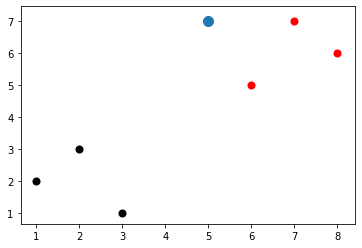

In [3]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [22]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False): 
#K= numero de puntos vecinos
#data, puntos para entrenar
#predict, puntos para predecir
    
    if len(data) >= k: 
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data: #recordar que data es un array de 2 grupos de datos(rojos y negros)
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2) #distancia euclieda
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2)) #distancia euclidea con numpy
            d = np.linalg.norm(np.array(feature) - np.array(predict)) #otra euclidea usando numpy con linalg con la norma
            
            distances.append([d, group]) #añadimos a la lista la distancia y el grupo
    
    if verbose:
        print(distances)
        
    #Ahora ordenaremos los k primeros datos de la lista de distances según su distancia y nos quedamos solo con el grupo
    #sorted ordena por la primera columna(la distancia d). Ordenamos los k primeros
    #i[1] para quedarnos solo con la columna de las clases(group) de distances
    votes = [i[1] for i in sorted(distances)[:k]]
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1) #para que nos diga que grupo es mayoritario(rojos o negros)
    if verbose:
        print(vote_result)
    
    
    return vote_result[0][0] #[('r',2), ('k', 1)]

In [5]:
new_point = [4,4.5]
result = k_nearest_neighbors(dataset, [new_point])
result

'k'

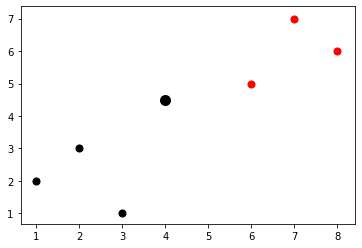

In [6]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

# Aplicando nuestro KNN al Dataset del Cancer

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")

In [25]:
df.replace("?", -99999, inplace=True)

In [26]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [27]:
df.drop(["name"], 1, inplace=True)

In [28]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [29]:
full_data = df.astype(float).values.tolist()

In [30]:
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [31]:
import random

In [32]:
random.shuffle(full_data) #reordenamos los datos aleatoriamente

In [33]:
test_size = 0.2 #20% para testear

In [34]:
train_set = {2:[],4:[]} #diccionarios
test_set = {2:[], 4:[]}

In [35]:
train_data= full_data[:-int(test_size*len(full_data))] #pillamos todos los elementos menos el último 20% para entrenar
test_data = full_data[-int(test_size*len(full_data)):] #pillamos todos menos el primer 20% del data para testear

In [36]:
for i in train_data: #rellenamos el diccionario de train_set con los datos de train_data creados arriba
    train_set[i[-1]].append(i[:-1])
    
for i in test_data: #rellenamos el diccionario de test_set con los datos de test_data creados arriba
    test_set[i[-1]].append(i[:-1])

In [38]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5) #aplicamos la función que hemos creado antes
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9640287769784173
